In [1]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# def select_top_200_features(model):
#     """ Extract top 200 features per label. """

#     indices_list, values_list = [], []
#     for i in range(len(model.coef_)):
#         sorted_indices_per_label = np.argsort(np.absolute(model.coef_[i, :]))[-100:][::-1]
#         sorted_values_per_label = np.take(model.coef_[i,:], sorted_indices_per_label)
#         indices_list.extend(sorted_indices_per_label)
#         values_list.extend(sorted_values_per_label)
#     top_200_values_indices = np.argsort(np.absolute(values_list))[-200:][::-1]
#     top_200_features_indices = np.take(indices_list, top_200_values_indices)
#     return top_200_features_indices

def select_top_200_features(model):
    """ Extract top 200 features per label. """

    return np.argsort(np.absolute(model.coef_))[-200:][::-1]

def plot_confusion_matrix(validations, predictions):
    """ Plot confusion matrix and compare real labels with predicted labels. """

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(10, 5))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

### Entire NG20 dataset

In [3]:
vectorizer = TfidfVectorizer()
# categories = ['alt.atheism', 'talk.religion.misc', 'sci.space', 'comp.graphics']

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')
y_train = X_train.target
y_test = X_test.target

LABELS = set(y_train)

X_train = vectorizer.fit_transform(X_train.data).todense()
X_test = vectorizer.transform(X_test.data).todense()
print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('X_test shape -', X_test.shape)
print('y_test shape -', y_test.shape)
print('Labels -', LABELS)

X_train shape - (11314, 130107)
y_train shape - (11314,)
X_test shape - (7532, 130107)
y_test shape - (7532,)
Labels - {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [4]:
lr = Lasso(alpha=0.0005)
lr.fit(X_train, y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [5]:
np.argsort(np.absolute(lr.coef_))[-200:][::-1]

array([ 45059, 125509, 105155,  30101,  90627,  72206,  34011,  77297,
        35296, 103554,  38886, 124463,  39084,  30105,  30128,  69411,
       120608, 121462, 114986,  60150,  40759, 124434,  81207,  39596,
       109385,  12688,  32754,  49122,  76101,  62466,  30143,  99721,
        30102,  71678,  39924,  25389,  34726,  94862,  84241, 119781,
       123731,  34137,  33019,  79253,  13519,  76249,  68293,  40372,
        70600,  73960,  68693,  45530, 102987,  71830,  92985,  73126,
        60892,  95246,  32372,  26896,  34141,  96737,  43230, 122997,
        34224,  96299, 116382,  55307,  33203,  39816, 112044,  86024,
        96698,  83638,  63781,  60915,  98474,  95264, 109504,  33492,
       121655,  58182,  40422,  56420,  42817,  26298,  12661,  58306,
        39603, 113584, 116718, 115062,  66208, 102111,  70439, 111111,
        47013,  51552,  37955,  68692,  64572, 119484,  95162, 114205,
       106184,  54590,  54754,  55328,  79197,  28287, 109061,  79831,
      

In [6]:
top_200_features_indices = select_top_200_features(lr)
filtered_X_train = np.take(X_train, top_200_features_indices, axis=1)
filtered_X_test = np.take(X_test, top_200_features_indices, axis=1)

In [7]:
lr_new = LogisticRegression(max_iter=100).fit(filtered_X_train, y_train)
predictions_new = lr_new.predict(filtered_X_test)

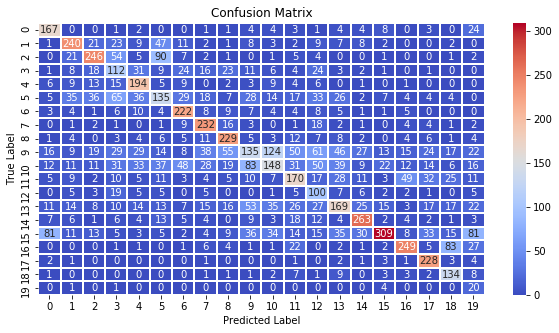

              precision    recall  f1-score   support

           0       0.52      0.74      0.61       227
           1       0.62      0.61      0.61       396
           2       0.62      0.56      0.59       440
           3       0.29      0.38      0.33       294
           4       0.50      0.70      0.59       277
           5       0.34      0.27      0.30       505
           6       0.57      0.74      0.64       302
           7       0.59      0.78      0.67       298
           8       0.58      0.73      0.64       315
           9       0.34      0.18      0.24       751
          10       0.37      0.22      0.28       660
          11       0.43      0.41      0.42       417
          12       0.25      0.58      0.35       171
          13       0.43      0.33      0.37       517
          14       0.67      0.72      0.69       367
          15       0.78      0.42      0.54       743
          16       0.68      0.61      0.65       406
          17       0.61    

In [8]:
plot_confusion_matrix(predictions_new, y_test)
print(classification_report(predictions_new, y_test))

### Subset of 20NG Dataset

In [3]:
vectorizer = TfidfVectorizer()
categories = ['alt.atheism', 'talk.religion.misc', 'sci.space', 'comp.graphics']

X_train = fetch_20newsgroups(subset='train', categories=categories)
X_test = fetch_20newsgroups(subset='test', categories=categories)
y_train = X_train.target
y_test = X_test.target

LABELS = set(y_train)

X_train = vectorizer.fit_transform(X_train.data).todense()
X_test = vectorizer.transform(X_test.data).todense()
print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('X_test shape -', X_test.shape)
print('y_test shape -', y_test.shape)
print('Labels -', LABELS)

X_train shape - (2034, 34118)
y_train shape - (2034,)
X_test shape - (1353, 34118)
y_test shape - (1353,)
Labels - {0, 1, 2, 3}


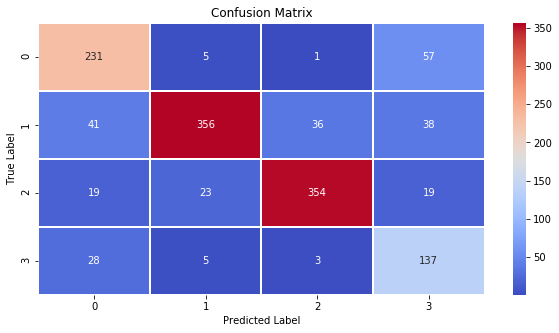

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       294
           1       0.92      0.76      0.83       471
           2       0.90      0.85      0.88       415
           3       0.55      0.79      0.65       173

    accuracy                           0.80      1353
   macro avg       0.77      0.80      0.78      1353
weighted avg       0.82      0.80      0.80      1353



In [7]:
lr = Lasso(alpha=0.0005)
lr.fit(X_train, y_train)

top_200_features_indices = select_top_200_features(lr)
filtered_X_train = np.take(X_train, top_200_features_indices, axis=1)
filtered_X_test = np.take(X_test, top_200_features_indices, axis=1)

lr_new = LogisticRegression(max_iter=100).fit(filtered_X_train, y_train)
predictions_new = lr_new.predict(filtered_X_test)

plot_confusion_matrix(predictions_new, y_test)
print(classification_report(predictions_new, y_test))